# **Import Data**

In [ ]:
# !pip install gdown

In [ ]:
import pandas as pd
from google.colab import auth
from googleapiclient.discovery import build
from googleapiclient.http import MediaIoBaseDownload

# Authenticate Google Drive API
auth.authenticate_user()

# Shared link to the CSV file
shared_link = 'https://drive.google.com/file/d/15akUhOJmwAiVRzMRJml6AP_00B40Jmc9/view?usp=sharing'

# Extract file ID from the shared link
file_id = shared_link.split('/')[-2]

# Use Google Drive API to download the file
drive_service = build('drive', 'v3')
request = drive_service.files().get_media(fileId=file_id)

# Specify the path where you want to save the downloaded file
output_path = '/content/IPL_2022_tweets.csv'

# Download the file
with open(output_path, 'wb') as f:
    downloader = MediaIoBaseDownload(f, request)
    done = False
    while done is False:
        status, done = downloader.next_chunk()

# Read the CSV file
df = pd.read_csv(output_path)

# Display the first few rows of the DataFrame
df.head()

<ipython-input-1-1270e60532aa>:30: DtypeWarning: Columns (5,6,7,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(output_path)


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,World Cricket Baba,india,! Links Baba:\nhttps://t.co/L3bxQ4jPHK\nhttps:...,2022-04-13 06:34:29,1076.0,63.0,699.0,False,2022-06-20 22:00:03,👉World Cricket Baba!👈 Top Countries With the \...,"['cricketBaba', 'IPL2022', 'Cricket', 'Deltin7...",Postify1,False
1,The Times Of India,New Delhi,News. Views. Analysis. Conversations. India’s ...,2010-04-19 10:50:15,14429584.0,457.0,6.0,True,2022-06-20 21:30:00,How fans of @ViratGang @BoldBrigade @Fanaticso...,"['IPL2022', 'RCB', 'MI', 'CSK', 'TOISportscast']",Twitter Web App,False
2,World Cricket Baba,india,! Links Baba:\nhttps://t.co/L3bxQ4jPHK\nhttps:...,2022-04-13 06:34:29,1076.0,63.0,699.0,False,2022-06-20 20:00:24,👉World Cricket Baba!👈 Top Countries With the \...,"['cricketBaba', 'IPL2022', 'Cricket', 'Deltin7...",Postify1,False
3,𝕊𝕠𝕔𝕚𝕒𝕝 𝔸𝕟𝕚𝕞𝕒𝕝,India,I’m here to avoid my friends on Facebook.,2013-10-15 04:34:14,124.0,502.0,2675.0,False,2022-06-20 19:10:00,@Chigurupati_H WOW!!\n3 ducks with 3 chicks!!\...,['IPL2022'],Twitter for Android,False
4,World Cricket Baba,india,! Links Baba:\nhttps://t.co/L3bxQ4jPHK\nhttps:...,2022-04-13 06:34:29,1076.0,63.0,699.0,False,2022-06-20 19:00:18,👉World Cricket Baba!👈 Top Countries With the \...,"['cricketBaba', 'IPL2022', 'Cricket', 'Deltin7...",Postify1,False


### **Data Cleaning & Preprocessing**

*   Convert to Lowercase
*   Remove Punctuations
*   Remove Next Line
*   Remove Emoticons
*   Remove Tabs
*   Remove Numbers
*   Remove Stop Words
*   Perform Lemmatization











In [ ]:
#convert to lowercase
df['cleaned_tweets'] = df['text']
columns_to_convert = ['cleaned_tweets']
df[columns_to_convert] = df[columns_to_convert].apply(lambda x: x.str.lower())

In [ ]:
import string

#Remove punctuations
def remove_punctuation(text):
    return text.replace('[{}]'.format(string.punctuation), '', regex=True)

# Apply the function to the DataFrame column
df[columns_to_convert] = remove_punctuation(df[columns_to_convert])

In [ ]:
#Remove Next line
df[columns_to_convert] = df[columns_to_convert].apply(lambda x: x.replace(r'\n',' ', regex=True))

In [ ]:
#Remove Emoticons
df[columns_to_convert] = df[columns_to_convert].apply(lambda x: x).astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

In [ ]:
#Remove Tabs
df[columns_to_convert] = df[columns_to_convert].apply(lambda x: x.str.replace('\t', ''))

In [ ]:
#Remove number
df[columns_to_convert] = df[columns_to_convert].apply(lambda x: x.str.replace('\d', '', regex=True))

In [ ]:
from nltk.corpus import stopwords  # Import stopwords module from NLTK
import spacy  # Import Spacy library
import nltk
nltk.download('stopwords')

# Remove stop words function
stop_words = stopwords.words('english')  # Get English stopwords list
def remove_stop_words(text):
    words = text.split()  # Split the text into words
    filtered_words = [word for word in words if word.lower() not in stop_words]  # Filter out stopwords
    return ' '.join(filtered_words)  # Join the filtered words back into a string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Remove stop words
df[columns_to_convert] = df[columns_to_convert].applymap(remove_stop_words)

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')

# Function to lemmatize text
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    tokenized_words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in tokenized_words]
    return ' '.join(lemmatized_words)

# Apply lemmatization to the column and append results to a new column
df['lemmatized_tweets'] = df['cleaned_tweets'].apply(lemmatize_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df.head(5)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,cleaned_tweets,lemmatized_tweets
0,World Cricket Baba,india,! Links Baba:\nhttps://t.co/L3bxQ4jPHK\nhttps:...,2022-04-13 06:34:29,1076.0,63.0,699.0,False,2022-06-20 22:00:03,👉World Cricket Baba!👈 Top Countries With the \...,"['cricketBaba', 'IPL2022', 'Cricket', 'Deltin7...",Postify1,False,world cricket baba top countries best cricket ...,world cricket baba top country best cricket fa...
1,The Times Of India,New Delhi,News. Views. Analysis. Conversations. India’s ...,2010-04-19 10:50:15,14429584.0,457.0,6.0,True,2022-06-20 21:30:00,How fans of @ViratGang @BoldBrigade @Fanaticso...,"['IPL2022', 'RCB', 'MI', 'CSK', 'TOISportscast']",Twitter Web App,False,fans viratgang boldbrigade fanaticsofmi cskfan...,fan viratgang boldbrigade fanaticsofmi cskfans...
2,World Cricket Baba,india,! Links Baba:\nhttps://t.co/L3bxQ4jPHK\nhttps:...,2022-04-13 06:34:29,1076.0,63.0,699.0,False,2022-06-20 20:00:24,👉World Cricket Baba!👈 Top Countries With the \...,"['cricketBaba', 'IPL2022', 'Cricket', 'Deltin7...",Postify1,False,world cricket baba top countries best cricket ...,world cricket baba top country best cricket fa...
3,𝕊𝕠𝕔𝕚𝕒𝕝 𝔸𝕟𝕚𝕞𝕒𝕝,India,I’m here to avoid my friends on Facebook.,2013-10-15 04:34:14,124.0,502.0,2675.0,False,2022-06-20 19:10:00,@Chigurupati_H WOW!!\n3 ducks with 3 chicks!!\...,['IPL2022'],Twitter for Android,False,chigurupatih wow ducks chicks ipl,chigurupatih wow duck chick ipl
4,World Cricket Baba,india,! Links Baba:\nhttps://t.co/L3bxQ4jPHK\nhttps:...,2022-04-13 06:34:29,1076.0,63.0,699.0,False,2022-06-20 19:00:18,👉World Cricket Baba!👈 Top Countries With the \...,"['cricketBaba', 'IPL2022', 'Cricket', 'Deltin7...",Postify1,False,world cricket baba top countries best cricket ...,world cricket baba top country best cricket fa...


# **LDA Model**

In [ ]:
df_lda = df[['text', 'cleaned_tweets', 'lemmatized_tweets']]

In [ ]:
df_lda.head(5)

,text,cleaned_tweets,lemmatized_tweets
0,👉World Cricket Baba!👈 Top Countries With the \...,world cricket baba top countries best cricket ...,world cricket baba top country best cricket fa...
1,How fans of @ViratGang @BoldBrigade @Fanaticso...,fans viratgang boldbrigade fanaticsofmi cskfan...,fan viratgang boldbrigade fanaticsofmi cskfans...
2,👉World Cricket Baba!👈 Top Countries With the \...,world cricket baba top countries best cricket ...,world cricket baba top country best cricket fa...
3,@Chigurupati_H WOW!!\n3 ducks with 3 chicks!!\...,chigurupatih wow ducks chicks ipl,chigurupatih wow duck chick ipl
4,👉World Cricket Baba!👈 Top Countries With the \...,world cricket baba top countries best cricket ...,world cricket baba top country best cricket fa...


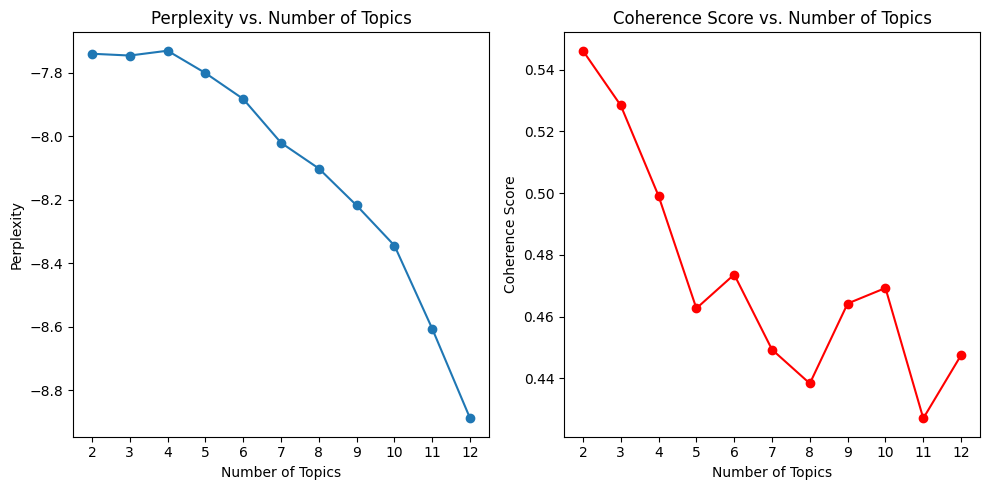

In [ ]:
import gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# Tokenize the tweets
tokenized_tweets = [tweet.split() for tweet in df_lda['lemmatized_tweets']]

# Create Dictionary
dictionary = corpora.Dictionary(tokenized_tweets)

# Filter out tokens that appear in less than 5 documents or more than 50% of the documents
dictionary.filter_extremes(no_below=5, no_above=0.5)

# Convert the dictionary to a bag-of-words corpus
corpus = [dictionary.doc2bow(tweet) for tweet in tokenized_tweets]

# Set the number of topics
min_topics = 2
max_topics = 12

# Lists to store perplexity and coherence scores
perplexity_scores = []
coherence_scores = []

for num_topics in range(min_topics, max_topics+1):
    # Build LDA model
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)

    # Compute perplexity
    perplexity = lda_model.log_perplexity(corpus)
    perplexity_scores.append(perplexity)

    # Compute coherence
    coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_tweets, dictionary=dictionary, coherence='c_v')
    coherence = coherence_model_lda.get_coherence()
    coherence_scores.append(coherence)

# Plotting the scores
plt.figure(figsize=(10, 5))

# Plot perplexity
plt.subplot(1, 2, 1)
plt.plot(range(min_topics, max_topics+1), perplexity_scores, marker='o')
plt.title('Perplexity vs. Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity')
plt.xticks(range(min_topics, max_topics+1))

# Plot coherence
plt.subplot(1, 2, 2)
plt.plot(range(min_topics, max_topics+1), coherence_scores, marker='o', color='r')
plt.title('Coherence Score vs. Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.xticks(range(min_topics, max_topics+1))

plt.tight_layout()
plt.show()


In [ ]:
import gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# Tokenize the lemmatized tweets
tokenized_lemmatized_tweets = [tweet.split() for tweet in df_lda['lemmatized_tweets']]

# Create Dictionary
dictionary_lemmatized = corpora.Dictionary(tokenized_lemmatized_tweets)

# Filter out tokens that appear in less than 5 documents or more than 50% of the documents
dictionary_lemmatized.filter_extremes(no_below=5, no_above=0.5)

# Convert the dictionary to a bag-of-words corpus
corpus_lemmatized = [dictionary_lemmatized.doc2bow(tweet) for tweet in tokenized_lemmatized_tweets]

# Set the number of topics
num_topics = 6

# Build LDA model
lda_model_lemmatized = LdaModel(corpus=corpus_lemmatized, id2word=dictionary_lemmatized, num_topics=num_topics)

# Print the topics
print(lda_model_lemmatized.print_topics())

# Assign the topics to the tweets
topics_per_lemmatized_tweet = [lda_model_lemmatized.get_document_topics(tweet) for tweet in corpus_lemmatized]

[(0, '0.034*"tataiplauction" + 0.033*"kkr" + 0.022*"tataipl" + 0.022*"lucknow" + 0.018*"tata" + 0.017*"srh" + 0.015*"dc" + 0.015*"lucknowsupergiants" + 0.014*"rajasthanroyals" + 0.013*"rr"'), (1, '0.025*"live" + 0.025*"player" + 0.019*"rahul" + 0.017*"iyer" + 0.017*"unsold" + 0.015*"warner" + 0.015*"shreyas" + 0.015*"kl" + 0.015*"delhicapitals" + 0.014*"david"'), (2, '0.130*"iplauction" + 0.088*"iplmegaauction" + 0.027*"cricket" + 0.019*"csk" + 0.018*"crore" + 0.018*"bcci" + 0.016*"sold" + 0.013*"msdhoni" + 0.011*"crickettwitter" + 0.011*"tataipl"'), (3, '0.045*"ahmedabad" + 0.041*"lucknow" + 0.030*"mumbai" + 0.026*"team" + 0.022*"super" + 0.021*"hardik" + 0.021*"indian" + 0.020*"pandya" + 0.018*"lucknowiplteam" + 0.017*"hardikpandya"'), (4, '0.278*"vicustomercare" + 0.163*"vifanofthematch" + 0.073*"march" + 0.053*"lsgvcsk" + 0.048*"th" + 0.046*"run" + 0.038*"an" + 0.022*"answer" + 0.022*"q" + 0.018*"kkrvpbks"'), (5, '0.031*"auction" + 0.025*"rcb" + 0.025*"team" + 0.020*"cr" + 0.017*"p

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define the output directory in your Google Drive
output_dir = '/content/drive/My Drive/wordcloud_images'
os.makedirs(output_dir, exist_ok=True)

# Create a single figure for all word clouds
fig, axs = plt.subplots(num_topics // 3 + (num_topics % 3 > 0), 3, figsize=(15, 5 * (num_topics // 3 + (num_topics % 3 > 0))))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Generate word cloud for each topic
for i, topic in lda_model_lemmatized.show_topics(num_topics=num_topics, formatted=False):
    word_freq = {word: freq for word, freq in topic}
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

    # Plot word cloud in the corresponding subplot
    ax = axs[i // 3, i % 3]
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title('Topic {}'.format(i))
    ax.axis('off')

# Save the figure as a single image
plt.savefig(os.path.join(output_dir, 'all_topics_wordcloud.png'), bbox_inches='tight', dpi=300)
plt.close()  # Close the figure

print("Word cloud image of all topics saved successfully.")


Mounted at /content/drive
Word cloud image of all topics saved successfully.


In [ ]:
# !pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 29.9 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.2.1 which is incompatible.


In [ ]:
# pip install pandas==1.3.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 20.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.1
    Uninstalling pandas-2.2.1:
      Successfully uninstalled pandas-2.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.0.0 requires pandas>=1.5.0, but you have pandas 1.3.3 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 1.3.3 which is incompatible.
mizani 0.9.3 requires pandas>=1.3.5, but you have pandas 1.3.3 which is incompatible.
plotnine 0.12.4 requires pandas>=1.5.0, but you have pandas 1.3.3 which is incompatible.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.3.3 which is incompatible.
xarray 2023.7.0 requires pandas>=1.4, but you have pandas 1.3.3 which is incompatible.


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from google.colab import files

# Prepare the data for visualization
lda_display = gensimvis.prepare(lda_model_lemmatized, corpus_lemmatized, dictionary_lemmatized, sort_topics=False, n_jobs=1)

# Save the visualization as an HTML file
pyLDAvis.save_html(lda_display, 'lda_visualization.html')

# Move the HTML file to Google Drive
drive.mount('/content/drive')
!mv lda_visualization.html '/content/drive/My Drive/'

print("LDA visualization saved successfully to Google Drive.")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  "Data is timezone-aware. Converting "


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
LDA visualization saved successfully to Google Drive.


# **LSA Model**

In [ ]:
df_lsa = df[['text', 'cleaned_tweets', 'lemmatized_tweets']]

In [ ]:
df_lsa.head(5)

,text,cleaned_tweets,lemmatized_tweets
0,👉World Cricket Baba!👈 Top Countries With the \...,world cricket baba top countries best cricket ...,world cricket baba top country best cricket fa...
1,How fans of @ViratGang @BoldBrigade @Fanaticso...,fans viratgang boldbrigade fanaticsofmi cskfan...,fan viratgang boldbrigade fanaticsofmi cskfans...
2,👉World Cricket Baba!👈 Top Countries With the \...,world cricket baba top countries best cricket ...,world cricket baba top country best cricket fa...
3,@Chigurupati_H WOW!!\n3 ducks with 3 chicks!!\...,chigurupatih wow ducks chicks ipl,chigurupatih wow duck chick ipl
4,👉World Cricket Baba!👈 Top Countries With the \...,world cricket baba top countries best cricket ...,world cricket baba top country best cricket fa...


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 11/11 [06:52<00:00, 37.51s/it]


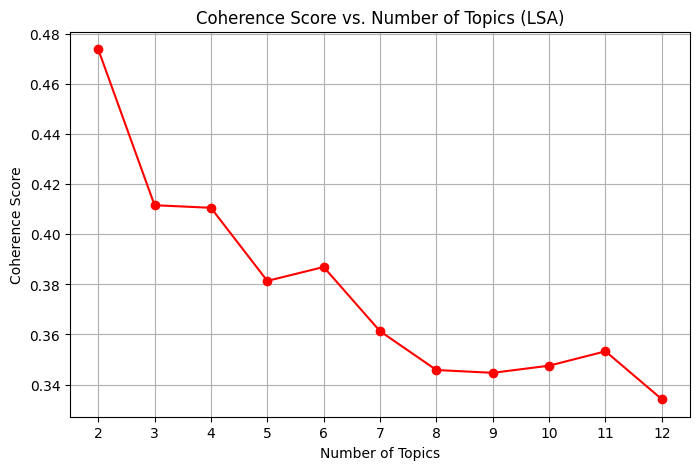

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm

# Initialize lists to store perplexity and coherence scores
perplexity_scores = []
coherence_scores = []

# Assuming df_lsa['lemmatized_tweets'] contains lemmatized tweets as strings
docs = df_lsa['lemmatized_tweets'].tolist()

# Convert the documents into tokenized form
tokenized_docs = [doc.split() for doc in docs]

# Convert the tokenized documents into TF-IDF matrix
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(docs)

# Set the range of number of topics
min_topics = 2
max_topics = 12

# Convert TF-IDF terms to a Gensim dictionary
dictionary = Dictionary(tokenized_docs)

# Iterate through different number of topics
for num_topics in tqdm(range(min_topics, max_topics+1)):
    # Apply LSA
    lsa_model = TruncatedSVD(n_components=num_topics)  # Set the number of topics/components
    lsa_topic_matrix = lsa_model.fit_transform(tfidf_matrix)

    # Convert components into lists of words
    terms = vectorizer.get_feature_names_out()
    topic_words = []
    for topic in lsa_model.components_:
        top_words_idx = np.argsort(topic)[::-1][:10]  # Select top 10 words
        top_words = [terms[idx] for idx in top_words_idx]
        topic_words.append(top_words)

    # Calculate coherence score
    coherence_model_lsa = CoherenceModel(topics=topic_words, texts=tokenized_docs, dictionary=dictionary, coherence='c_v')
    coherence = coherence_model_lsa.get_coherence()
    coherence_scores.append(coherence)

# Plotting the coherence scores
plt.figure(figsize=(8, 5))
plt.plot(range(min_topics, max_topics+1), coherence_scores, marker='o', color='r')
plt.title('Coherence Score vs. Number of Topics (LSA)')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.xticks(range(min_topics, max_topics+1))
plt.grid(True)
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


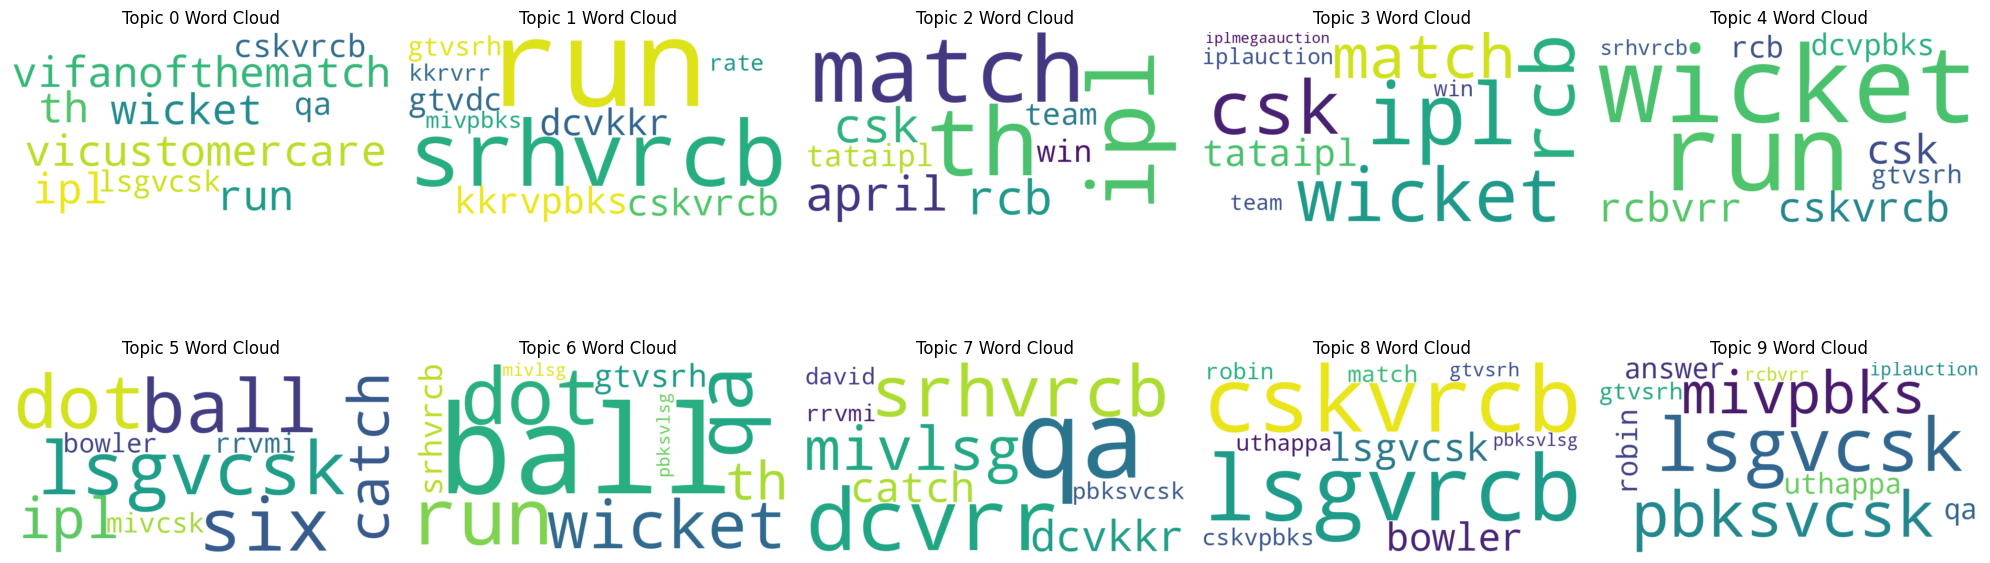

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel
from wordcloud import WordCloud
from tqdm import tqdm
from google.colab import drive
drive.mount('/content/drive')

# Assuming df_lsa['lemmatized_tweets'] contains lemmatized tweets as strings
docs = df_lsa['lemmatized_tweets'].tolist()

# Convert the documents into TF-IDF matrix
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(docs)

# Apply LSA
lsa_model = TruncatedSVD(n_components=10)  # Set the number of topics/components
lsa_topic_matrix = lsa_model.fit_transform(tfidf_matrix)

# Get the top words for each topic
terms = vectorizer.get_feature_names_out()  # Use get_feature_names_out() instead of get_feature_names()

# Create a single figure to contain all the word clouds
fig, axs = plt.subplots(2, 5, figsize=(20, 8))

for i, topic in enumerate(lsa_model.components_):
    top_words_idx = np.argsort(topic)[::-1][:10]  # Select top 10 words
    top_words = [terms[idx] for idx in top_words_idx]

    # Create word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(top_words))

    # Display the word cloud
    ax = axs[i // 5, i % 5]
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f"Topic {i} Word Cloud")
    ax.axis('off')

# Adjust layout
plt.tight_layout()

# Save the figure directly into your Google Drive
output_dir = '/content/drive/My Drive/'
plt.savefig(output_dir + 'wordclouds.png', bbox_inches='tight', dpi=300)
plt.show()


### **NMF Model**

In [ ]:
df_nmf = df[['text', 'cleaned_tweets', 'lemmatized_tweets']]

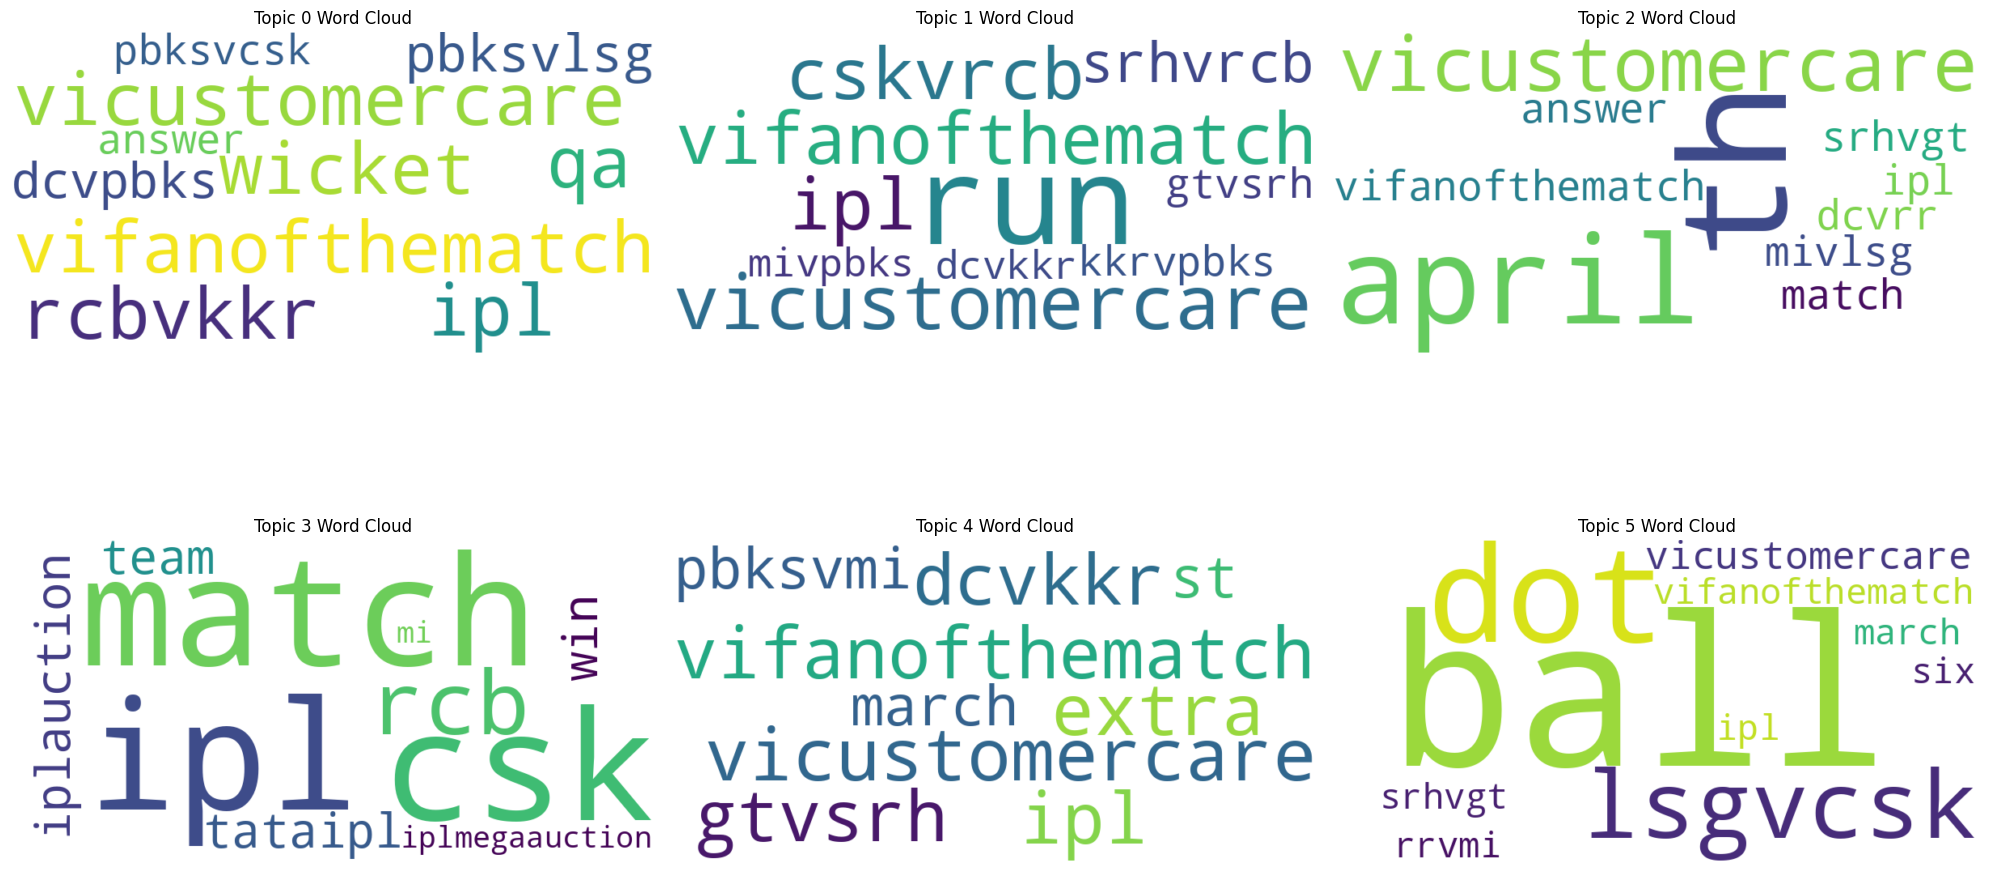

In [ ]:
from sklearn.decomposition import NMF

# Assuming df_lsa['lemmatized_tweets'] contains lemmatized tweets as strings
docs = df_nmf['lemmatized_tweets'].tolist()

# Convert the documents into tokenized form
tokenized_docs = [doc.split() for doc in docs]

# Convert the tokenized documents into TF-IDF matrix
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(docs)

# Apply NMF
nmf_model = NMF(n_components=6)  # Set the number of topics/components
nmf_topic_matrix = nmf_model.fit_transform(tfidf_matrix)

# Get the top words for each topic
terms = vectorizer.get_feature_names_out()  # Use get_feature_names_out() instead of get_feature_names()

# Create a single figure to contain all the word clouds
fig, axs = plt.subplots(2, 3, figsize=(20, 12))  # Adjust the subplot size to fit 6 topics

for i, topic in enumerate(nmf_model.components_):
    top_words_idx = np.argsort(topic)[::-1][:10]  # Select top 10 words
    top_words = [terms[idx] for idx in top_words_idx]

    # Create word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(top_words))

    # Display the word cloud
    ax = axs[i // 3, i % 3]  # Adjust indexing to fit the new subplot layout
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f"Topic {i} Word Cloud")
    ax.axis('off')

# Adjust layout
plt.tight_layout()

# Save the figure directly into your Google Drive
output_dir = '/content/drive/My Drive/'
plt.savefig(output_dir + 'wordclouds_nmf.png', bbox_inches='tight', dpi=300)
plt.show()
